<a href="https://colab.research.google.com/github/thxxx/datascience/blob/master/MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as pyplot

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/My Drive/data/movielens/'
os.listdir(path) # path에 뭐가 들어있는지 보여준다.

['ratings.csv', 'tags.csv', 'movies.csv', 'links.csv', 'README.txt']

In [9]:
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

In [12]:
print(ratings_df.shape)
print(ratings_df.head())
# time stamp 는 리뷰를 매긴 시점이다.

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [13]:
print(tags_df.shape)
print(tags_df.head())
# 유저가 영화에 준 태그

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [15]:
print(movies_df.shape)
print(movies_df.head())
# 영화에 대한 메타 정보

(9742, 2)
                                      title                                       genres
movieId                                                                                 
1                          Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
2                            Jumanji (1995)                   Adventure|Children|Fantasy
3                   Grumpier Old Men (1995)                               Comedy|Romance
4                  Waiting to Exhale (1995)                         Comedy|Drama|Romance
5        Father of the Bride Part II (1995)                                       Comedy


In [16]:
# 평점 데이터에 어떻게 평점을 내렸고 분포가 어떻게 되는지 기초 통계량을 살펴보자.
n_unique_users = len(ratings_df['userId'].unique()) # unique값은 중복을 없애고 몇명의 유저인지 보게해준다.
print(n_unique_users)

610


In [17]:
n_unique_movies = len(ratings_df['movieId'].unique())
print(n_unique_movies)

9724


In [18]:
# 내장 함수를 사용해서 값을 구한다.
print('평점의 평균: ', ratings_df['rating'].mean())
print('평점의 표준편차: ', ratings_df['rating'].std())

평점의 평균:  3.501556983616962
평점의 표준편차:  1.0425292390605359


In [21]:
ratings_df.info()
# 데이터 타입, 널값 개수를 알려준다.
# 널값 처리도 데이터 전처리 과정에서 고민해봐야하는 부분임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [22]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [23]:
# null 값이 있는지 확인한다.
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b7dbd1bd0>,
      dtype=object)

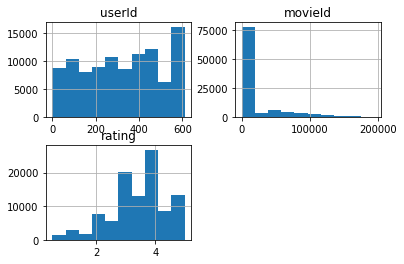

In [24]:
# 히스토그램 그려서 확인하기
ratings_df[['userId','movieId','rating']].hist()

In [25]:
# 평점을 예측하고자 할 때 일반적으로 몇점을 주는지 성향을 확인하고 데이터 셋의 느낌을 확인해서
# 제대로된 알고리즘인지 파악할 수 있다.

In [29]:
print(ratings_df.groupby(['userId', 'rating']).size())
# size()는 갯수 파악을 위해서 붙이나?

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64




---



In [31]:
ratings_df.groupby(['userId']).mean()
# userId로 전부 묶어서 보여준다.
# 데이터의 정보를 파악가능하다.

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [34]:
userid_rating_df = pd.DataFrame({'count':ratings_df.groupby(['userId', 'rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)
# 위에서 확인한 유저가 평점 몇에 몇개를 줬는지는 새로운 데이터 프레임을 정의한 후 확인하는 과정.

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [37]:
ratings_df.groupby('userId')['movieId'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

In [35]:
user_info = ratings_df.groupby('userId')['movieId'].count()

In [36]:
user_info.describe()
# 특정유저가 유독 많은 영화를 매겼다면 bias가 생길 수 있으니 조심하면 좋음

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [38]:
import seaborn as sns
# 시각화 패키지

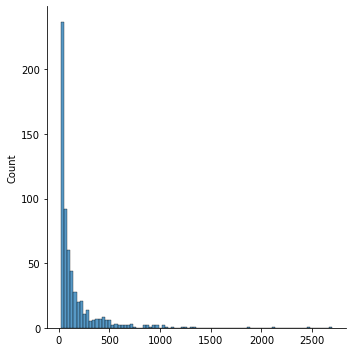

In [41]:
sns.displot(user_info.values)

유저가 평균적으로 준 평점과 평점을 준 영화의 수를 새로운 데이터 프레임으로 만들어서 보관

In [43]:
stats_df = pd.DataFrame({
    'movie_count':ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg':ratings_df.groupby('userId')['rating'].mean(),
    'rating_std':ratings_df.groupby('userId')['rating'].std()
})

print(stats_df.shape)
print(stats_df.head())

(610, 3)
        movie_count  rating_avg  rating_std
userId                                     
1               232    4.366379    0.800048
2                29    3.948276    0.805615
3                39    2.435897    2.090642
4               216    3.555556    1.314204
5                44    3.636364    0.990441


Rating이 많은 영화 즉, 사람들이 관심이 많은 영화 ( 좋다는건 아님 )

In [47]:
movieid_user_df = pd.DataFrame({
    'num_users_watch':ratings_df.groupby('movieId')['userId'].count(),
    'avg_ratings':ratings_df.groupby('movieId')['rating'].mean(),
    'std_ratings':ratings_df.groupby('movieId')['rating'].std()
})
movieid_user_df = movieid_user_df.reset_index() # 제일 첫 칼럼으로 index를 만든다.
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(9724, 4)
   movieId  num_users_watch  avg_ratings  std_ratings
0        1              215     3.920930     0.834859
1        2              110     3.431818     0.881713
2        3               52     3.259615     1.054823
3        4                7     2.357143     0.852168
4        5               49     3.071429     0.907148
5        6              102     3.946078     0.817224
6        7               54     3.185185     0.977561
7        8                8     2.875000     1.125992
8        9               16     3.125000     0.974679
9       10              132     3.496212     0.859381


표준편차가 작으면 대부분 평균근처의 점수를 줬다.
그럼 가장 많이 매긴순서대로 정렬해서 몇점인지 확인하자!

In [51]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False).head(5)

,movieId,num_users_watch,avg_ratings,std_ratings
314,356,329,4.164134,0.831244
277,318,317,4.429022,0.713019
257,296,307,4.197068,0.951997
510,593,279,4.161290,0.853983
1938,2571,278,4.192446,0.975243


대충은 보이는데.. 평균평점이 높으니까
별점을 준 유저가 1명이면 버릴건지 아닌지도 직접 판단해야되는 부분!

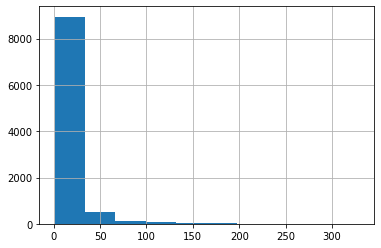

In [53]:
movieid_user_df['num_users_watch'].hist()
# 행렬화 했을 때 해당영화에 별점을 안준 유저가 많다 -> 듬성듬성하다 -> sparse하다

In [54]:
# 1명의 유저만 별점을 매긴 영화 수
movieid_user_df['movieId'][movieid_user_df.num_users_watch==1].count()

3446

In [55]:
# 3번 미만의 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 3].count()

4744

In [56]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [58]:
# 무비아이디를 기준으로 묶되 유저아이디의 수를 다 합쳐서 표현
ratings_count_df = ratings_df.groupby('movieId')['userId'].count(),
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [64]:
df = pd.DataFrame({
    'ratings_count':ratings_df.groupby('movieId')['userId'].count(),
})
print(df.head(10))

         ratings_count
movieId               
1                  215
2                  110
3                   52
4                    7
5                   49
6                  102
7                   54
8                    8
9                   16
10                 132


In [66]:
# apply가 뭐지
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [67]:
df.head(10)

,ratings_count,movie_name
movieId,,
1,215,Toy Story (1995)
2,110,Jumanji (1995)
3,52,Grumpier Old Men (1995)
4,7,Waiting to Exhale (1995)
5,49,Father of the Bride Part II (1995)
6,102,Heat (1995)
7,54,Sabrina (1995)
8,8,Tom and Huck (1995)
9,16,Sudden Death (1995)


In [68]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count,movie_name
movieId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
...,...,...
4093,1,Cop (1988)
4089,1,Born in East L.A. (1987)
58351,1,City of Men (Cidade dos Homens) (2007)


## 특정 영화의 평점 분포
movieId : 356, 포레스트 검프 (1994)

movieId : 2571. Matrix, The(1999)


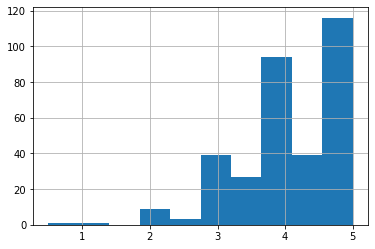

In [69]:
ratings_df[ratings_df.movieId == 356]['rating'].hist()

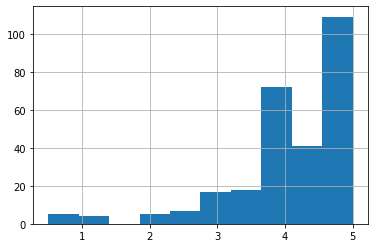

In [70]:
ratings_df[ratings_df.movieId == 2571]['rating'].hist()

# 특정 유저가 주는 평점과 실제 영화의 평점 분포가 비슷할까?

In [71]:
# 356번의 영화에 2점 미만으로 점수를 준 데이터
ratings_df[(ratings_df.movieId == 356) & (ratings_df.rating < 2)]

,userId,movieId,rating,timestamp
12274,76,356,1.0,1439165536
13553,89,356,0.5,1520408275


In [72]:
ratings_df[(ratings_df.movieId == 2571) & (ratings_df.rating < 2)]

,userId,movieId,rating,timestamp
442,4,2571,1.0,945173385
1130,10,2571,0.5,1455356378
8706,59,2571,1.0,953609098
12239,75,2571,1.0,1158967564
17337,111,2571,0.5,1516140656
22474,153,2571,0.5,1525548255
65107,416,2571,1.0,1187496634
71534,461,2571,0.5,1505935248
71706,462,2571,0.5,1154037742


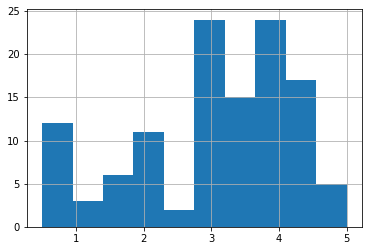

In [73]:
ratings_df[ratings_df.userId == 76]['rating'].hist()

76번의 점수 매긴 분포를 보니 356번 영화를 추천하면 안되겠네